# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


Plot the Data Appropriately

In [10]:
#Import neccssary Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Loading**

In [11]:
# Load dataset from Drive

from google.colab import drive
drive.mount('/content/drive')
data_format = pd.read_csv('/content/drive/MyDrive/Water Potability Model/water_potability.csv')
data_format.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Data Preprocessing**

In [12]:
# Inspect and Display basic information about the dataset
data_format.shape
data_format.describe()
data_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
# Check for missing values
missing_values = data_format.isnull().sum()
print("Missing Values:\n", missing_values)

# Fill the NaN values with the mean of the column
data_format1= data_format.fillna(data_format.mean(numeric_only=True))

# Verify that no missing values remain
print("Missing Values After Imputation:\n", data_format1.isnull().sum())

Missing Values:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Missing Values After Imputation:
 ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# **Data Splitting**

In [14]:
# Split features and labels
X = data_format1.drop('Potability', axis=1)
y = data_format1['Potability']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 70% training and 30% temporary set (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **Model Architecture**

In [30]:

# Initialize model
model = Sequential()

# Input Layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden Layer 1 (with L1 regularization)
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

#Compile the model
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience= 15, restore_best_weights=True)

# Split the temporary 30% set into 15% validation and 15% test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

#Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5708 - loss: 0.7595 - val_accuracy: 0.6293 - val_loss: 0.7439
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5840 - loss: 0.7526 - val_accuracy: 0.6273 - val_loss: 0.7412
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5754 - loss: 0.7595 - val_accuracy: 0.6273 - val_loss: 0.7388
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6002 - loss: 0.7495 - val_accuracy: 0.6273 - val_loss: 0.7371
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6108 - loss: 0.7425 - val_accuracy: 0.6273 - val_loss: 0.7359
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 0.7421 - val_accuracy: 0.6273 - val_loss: 0.7347
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6018 - loss: 0.7408 - val_accuracy: 0.6273 - val_loss: 0.7335
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6245 - loss: 0.7325 - val_accuracy: 0.6273 - val_loss: 0.

# **Model Evaluation**

Train Accuracy: 0.737, Test Accuracy: 0.683
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Confusion Matrix:
 [[212  97]
 [ 70 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       309
           1       0.54      0.62      0.58       183

    accuracy                           0.66       492
   macro avg       0.64      0.65      0.65       492
weighted avg       0.67      0.66      0.66       492


Model Performance Metrics:
Accuracy: 0.6606
Precision: 0.5381
Recall: 0.6175
F1 Score: 0.5751


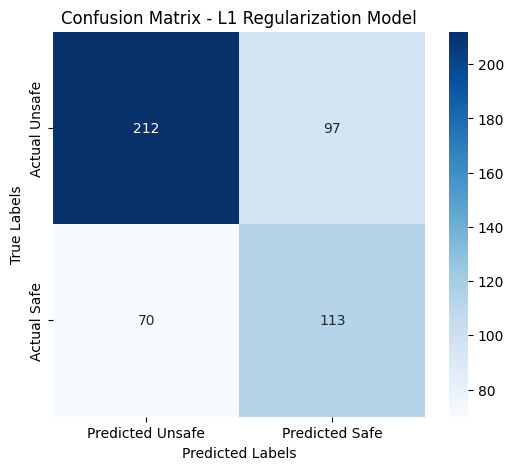

In [31]:
# Evaluate the model on the training set and test set
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print training and test accuracy
print(f'Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')
# Predictions using the  model on the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to binary labels (0 or 1) based on a threshold of 0.4
y_pred_labels = (y_pred > 0.4).astype(int)

# Print Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))

# Calculate additional metrics: Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)
accuracy = accuracy_score(y_test, y_pred_labels)

# Print the calculated metrics
print(f"\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Unsafe', 'Predicted Safe'], yticklabels=['Actual Unsafe', 'Actual Safe'])
plt.title('Confusion Matrix - L1 Regularization Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# **Plotting the training and validation accuracy and loss**

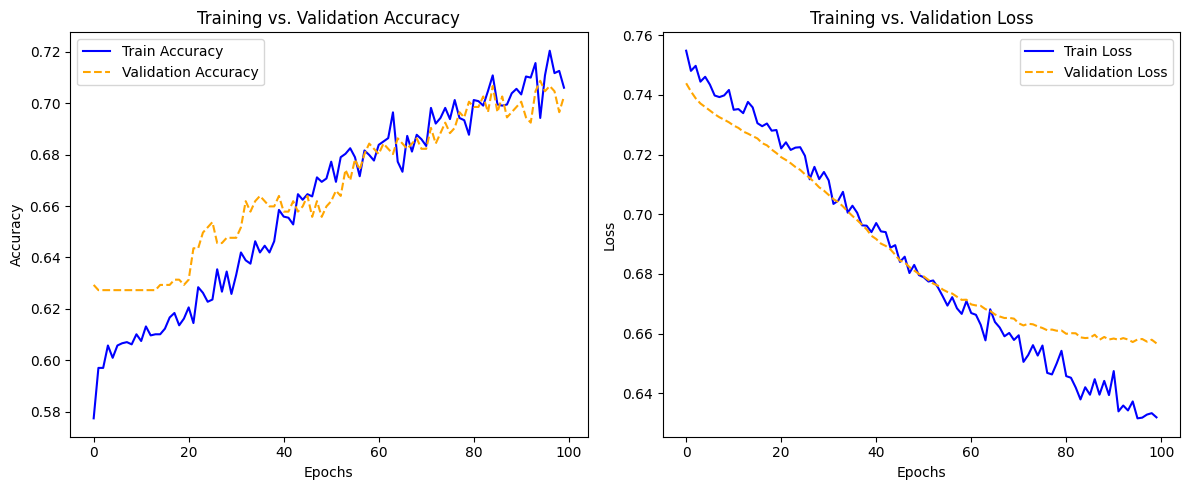

In [32]:
#Function to plot accuracy and loss curves
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training vs. Validation Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='dashed')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the results
plot_training_history(history)

In [ ]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,300 (91.02 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,651 (45.52 KB)

**Train Instance:** Water Potability Model


**Engineer Name:** Favour Akinwande


**Regularizer:** l1(0.0001)

**Optimizer:** SDG(LR (0.001))

**Early Stopping:** monitor='val_loss', patience= 15

**Dropout Rate:** 0.2, 0.2

**Accurayc**:0.6606

**F1 Score:** 0.5751

**Recall:**0.6175

**Precision:** 0.5381



# **Why I Chose These Parameters:**

**L1 Regularization (0.0001):** I selected L1 regularization to encourage sparsity in weights and reduce overfitting. I experimented with higher values like 0.001 and 0.005, but they caused underfitting. The value 0.0001 provided the best balance for model generalization. Since L1 was the only option I had, I optimized its strength through multiple trials.



**SGD Optimizer (LR = 0.001):**As SGD was the required optimizer, I tested different learning rates (e.g., 0.01, 0.005) but found that 0.001 allowed for smoother and more stable training. It minimized fluctuations and supported consistent convergence during training.


**Early Stopping (patience = 15):** I used early stopping to prevent overfitting. A patience value of 15 gave the model enough time to improve without halting prematurely, which helped stabilize validation performance.



**Dropout (0.2 / 0.2):** I tested higher dropout rates (0.3 and 0.4), but they led to lower recall and F1 scores. A 0.2 dropout rate on both layers provided the best compromise between regularization and learning capacity.

